Dataset do Kaggle:Glass Classification

# Importações

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, neighbors, metrics

In [2]:
data_raw = pd.read_csv('glass.csv')
data_raw.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Varificando dados inconsistentes

In [3]:
data_raw.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
data_raw.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
data_raw.duplicated().sum()

1

In [6]:
dt = data_raw.index[data_raw.duplicated()]
dt[0]

39

In [7]:
data_raw[37:42]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.0,1
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.0,0.0,1


Não queremos que este dado duplicado influencie na  classificação KNN, que realmente trata relacionado a casas vizinhas e neste caso o dado duplicado teria maior influência já que seriam dois vizinhos em uma mesma posição, e como é somente uma linha iremos excluir a mesma.

In [8]:
data_raw.drop(39, axis=0, inplace=True)

In [9]:
data_raw[37:42]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.0,1
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.0,0.0,1
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.0,0.0,1


Agora que resolvemos os dados inconsistentes, podemos atribuir ao DataFrame definitivo

In [10]:
df = data_raw

# Exploração dos dados

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


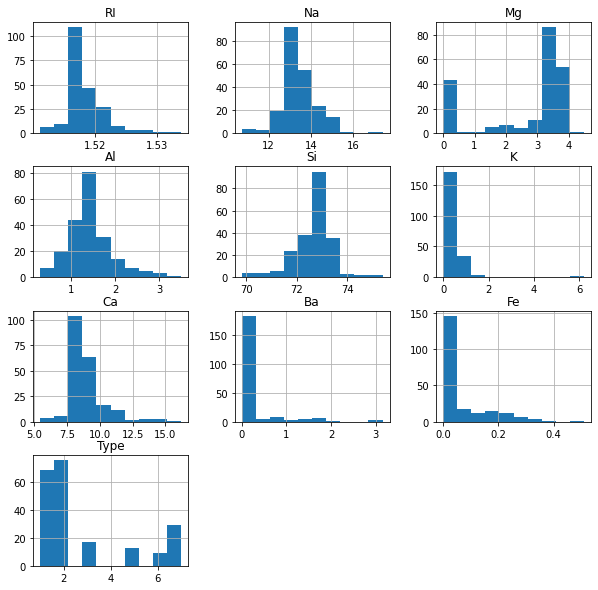

In [12]:
df.hist(figsize=(10,10));

A diferença de algumas colunas dos valores entre as colunas é grande, então neste caso teremos que efetuar uma normalização e a distribuição esta ruim, conforme o histigrama acima.

In [13]:
df.shape

(213, 10)

In [14]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [15]:
type_type = df.groupby(['Type'])['Type'].count()
type_type

Type
1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

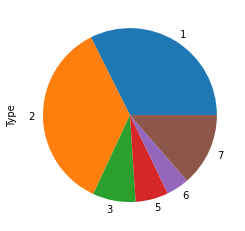

In [16]:
type_type.plot.pie();

Percebemos atraves do gráfico de pizza acima, que há uma consentração maior nos tipos de vidro do tipo 1 e 2

# Padronizando os dados

In [22]:
x = df.iloc[:, :9]
y = df.iloc[:, -1]

In [23]:
x = preprocessing.StandardScaler().fit_transform(x)
x[0:5]

array([[ 0.87984017,  0.28955813,  1.25723832, -0.70637047, -1.13324789,
        -0.67348013, -0.14346582, -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, -0.18086272,  0.09703652,
        -0.02896224, -0.79020061, -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 ,  0.18295033,  0.43374593,
        -0.16707322, -0.82534924, -0.35380764, -0.58830108],
       [-0.22729127, -0.23821559,  0.7017978 , -0.32234558, -0.05836783,
         0.10914874, -0.51604129, -0.35380764, -0.58830108],
       [-0.30660815, -0.16457274,  0.65319675, -0.42340476,  0.55029919,
         0.07845741, -0.62148718, -0.35380764, -0.58830108]])

A padronização com o Standard Scaler faz com que nossos recursos a uma padronização onde é removida a media que passaria a ser 0 e o desvio padrão será 1

# Treinando o modelo

In [67]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [68]:
ks = list(range(1,10))
precisao = []
for c in ks:
  k_nn = neighbors.KNeighborsClassifier(n_neighbors=c).fit(x_train, y_train)
  pred_k = k_nn.predict(x_test)
  precisao.append(metrics.accuracy_score(y_test, pred_k))
result = dict(zip((ks),(precisao)))
for k,v in result.items():
  print(f'Neighbors:{k} Accuracy score: {v}')

Neighbors:1 Accuracy score: 0.813953488372093
Neighbors:2 Accuracy score: 0.7906976744186046
Neighbors:3 Accuracy score: 0.813953488372093
Neighbors:4 Accuracy score: 0.7906976744186046
Neighbors:5 Accuracy score: 0.7674418604651163
Neighbors:6 Accuracy score: 0.7906976744186046
Neighbors:7 Accuracy score: 0.7906976744186046
Neighbors:8 Accuracy score: 0.7674418604651163
Neighbors:9 Accuracy score: 0.7674418604651163


Conforme acima testamos os valores para o número de vizinhos de 1 a 9 e o melhor resultado encontrado foi para "Neighbors: 1 e 3 Accuracy score: 0.813953488372093", onde a precisão foi a mais alta. Poderíamos testar com mais valores de k mais altos ( n_neighbors ) mas isso faria com que a fronteira de decisão ficasse mais sensível. Então para evitarmos também a alta variância  vamos escolher como o melhor sendo com 3 vizinhos.

# Visualização

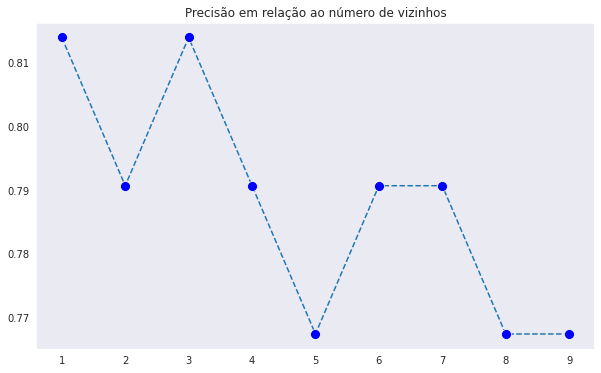

In [72]:
plt.figure(figsize=(10,6))
sns.set_style('dark')
plt.title('Precisão em relação ao número de vizinhos')
sns.lineplot(x=ks, y=precisao,  linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10);